In [1]:
%matplotlib inline
import sys
import os
sys.path.append("../src")
from graphprobe import loadviz, summarize
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
 category_colors = OrderedDict([                                                
       ('scene',    '#3288bd'),                                                   
       ('object',   '#99d594'),                                                   
       ('part',     '#e6f598'),                                                   
      ('material', '#fee08b'),                                                   
      ('texture',  '#fc8d59'),                                                   
      ('color',    '#d53e4f'),                                                  
      ('total',    '#aaaaaa')])
threshold = 0.05
categories = set(category_colors.keys())  
num_blobs = 8
script = "/home/nakamura/network_dissection/NetDissect/research/network_comparison_num_detectors_1107.ipynb"

In [3]:
alex = "../dissection/alexnet_imagenet_full_conv_384/"
alex_blobs = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]
vgg_material = "../dissection/vgg_material_full_conv/"
vgg_material_blobs = ["conv1_2", "conv2_2", "conv3_3", "conv4_3","conv5_3", "fc6-conv", "fc7-conv", "fc8-conv" ]
sentibank = "../dissection/caffe_sentibank_full_conv/"
sentibank_blobs = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

data[network_name] = [blob1, blob2, ...]

In [4]:
def make_data(cat):
    data = {}
    data["alex"] = []
    for blob in alex_blobs:
        alex_stats = summarize(loadviz(alex, blob), threshold,
                      top_only=True) 
        data["alex"].append(alex_stats[cat])

    data["vgg_material"] = []
    for blob in vgg_material_blobs:
        vgg_material_stats = summarize(loadviz(vgg_material, blob), threshold,
                      top_only=True) 
        data["vgg_material"].append(vgg_material_stats[cat])

    data["sentibank"] = []
    for blob in sentibank_blobs:
        sentibank_stats = summarize(loadviz(sentibank, blob), threshold,
                      top_only=True) 
        data["sentibank"].append(sentibank_stats[cat])
    return data


In [5]:
def plot_graph(cat):
    data = make_data(cat)
    fig = plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.plot(data["alex"], label="alex")
    ax.plot(data["vgg_material"], label="vgg_material")
    ax.plot(data["sentibank"], label="sentibank")
    ticks = [alex_blobs[i] + "/" + vgg_material_blobs[i] for i in range(len(alex_blobs))]
    ax.set_xticks(range(8))
    ax.set_xticklabels(ticks)
    ax.set_title("Comparison_of_number_of_detectors_{}".format(cat))

    plt.legend(loc="upper left")

    ax.set_ylabel('portion of units alinged to a category concept')
    return fig, ax

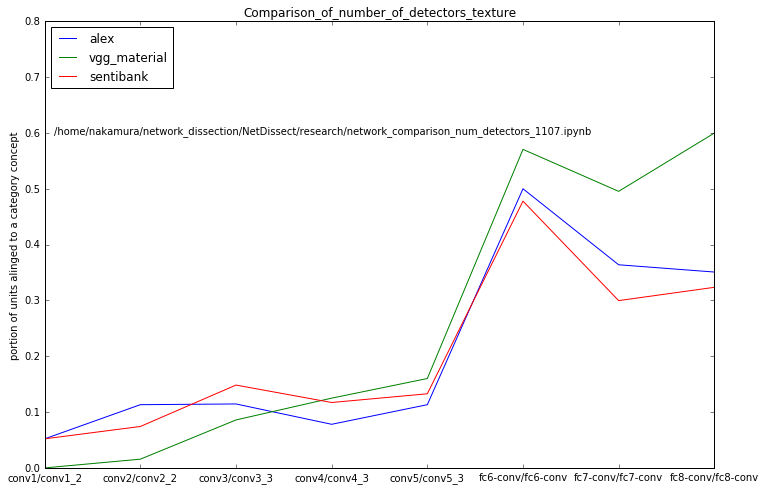

In [6]:
fig, ax = plot_graph("texture")
ax.set_ylim(0, 0.8)
ax.text(0.1, 0.6, script)
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_texture.pdf"))
plt.show()

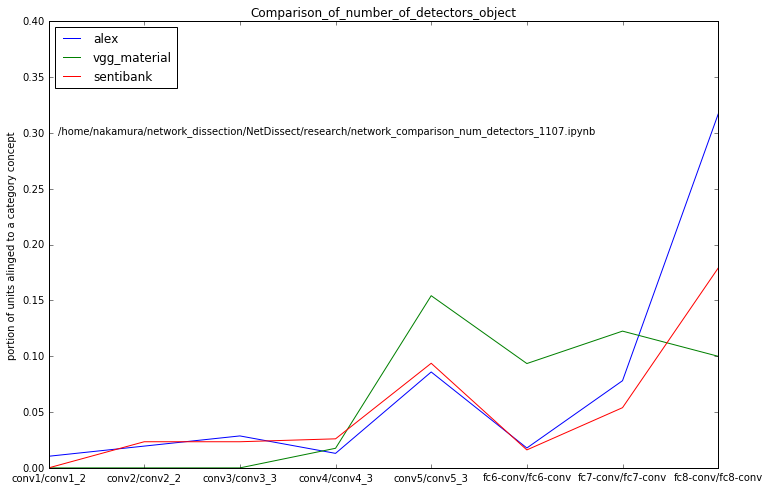

In [7]:
fig, ax = plot_graph("object")
ax.set_ylim(0, 0.4)
ax.text(0.1, 0.3, script)
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_object.pdf"))
plt.show()

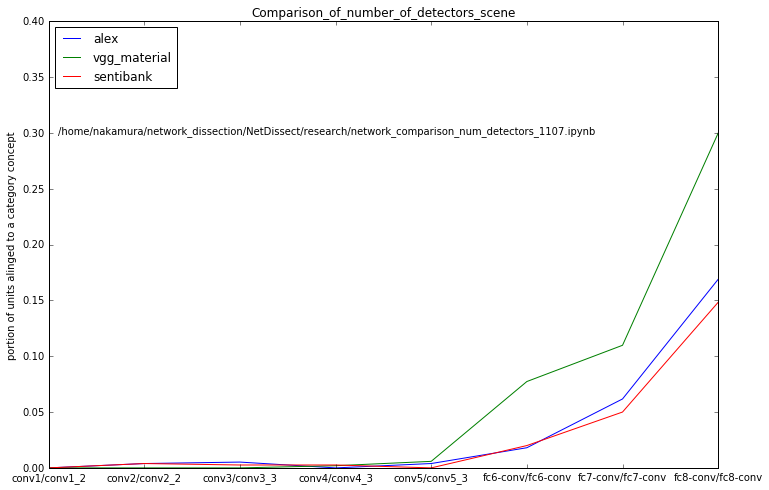

In [8]:
fig, ax = plot_graph("scene")
ax.set_ylim(0, 0.4)
ax.text(0.1, 0.3, script)
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_scene.pdf"))
plt.show()

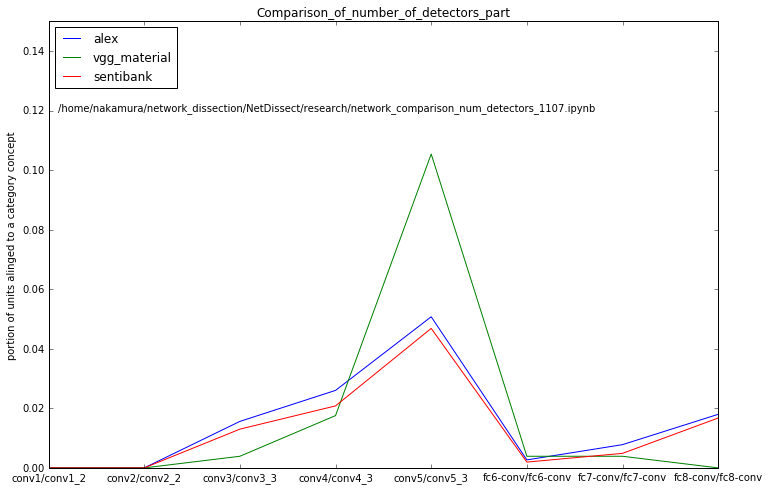

In [9]:
fig, ax = plot_graph("part")
ax.set_ylim(0, 0.15)
ax.text(0.1, 0.12, script)
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_part.pdf"))
plt.show()

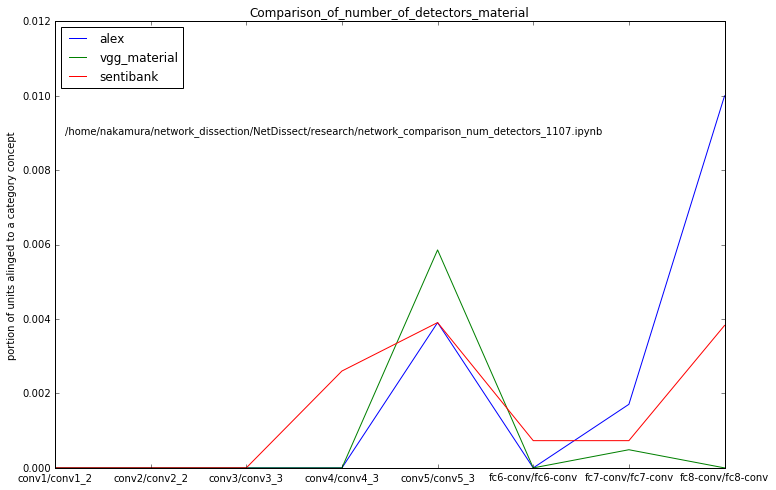

In [10]:
fig, ax = plot_graph("material")
ax.set_ylim(0, 0.012)
ax.text(0.1, 0.009, script)
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_material.pdf"))

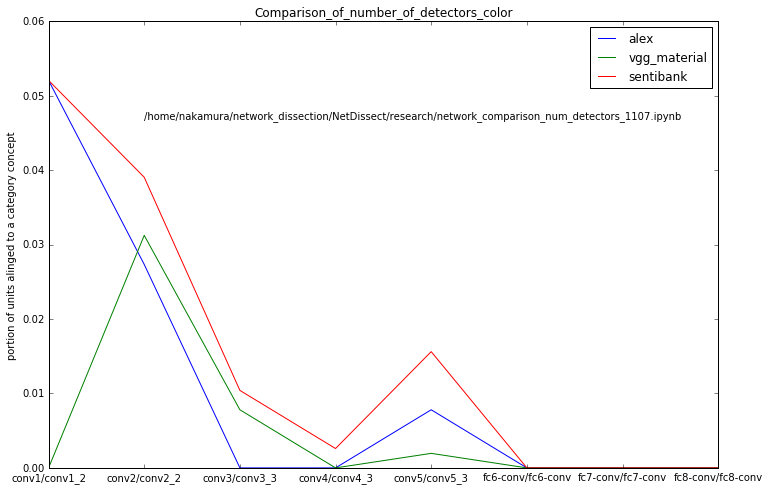

In [11]:
fig, ax = plot_graph("color")
ax.set_ylim(0, 0.06)
ax.text(1, 0.047, script)
ax.legend(loc="upper right")
plt.savefig(os.path.join("figures", "conparison_of_number_of_detectors_color.pdf"))
plt.show()